In [1]:
import pandas, numpy

In [2]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'

In [5]:
df = pandas.read_excel(input_file)

In [6]:
df.columns

Index(['Protein Group', 'Top', 'Accession', 'Significance', 'Coverage (%)',
       '#Peptides', '#Unique', 'PTM', 'ADRNOR_4H_1_1_2792 Area',
       'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area',
       'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area',
       'ADRNOR_4H_3_2_2799 Area', 'ADR_4H_1_1_2772 Area',
       'ADR_4H_1_2_2773 Area', 'ADR_4H_2_1_2775 Area', 'ADR_4H_2_2_2776 Area',
       'ADR_4H_3_1_2778 Area', 'ADR_4H_3_2_2779 Area', 'CTRL_4H_1_1_2752 Area',
       'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area',
       'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area',
       'CTRL_4H_3_2_2759 Area', 'NOR_4H_1_1_2781 Area', 'NOR_4H_1_2_2782 Area',
       'NOR_4H_2_1_2786 Area', 'NOR_4H_2_2_2787 Area', 'NOR_4H_3_1_2789 Area',
       'NOR_4H_3_2_2790 Area', 'TNF_4H_1_1_2761 Area', 'TNF_4H_1_2_2762 Area',
       'TNF_4H_2_1_2764 Area', 'TNF_4H_2_2_2765 Area', 'TNF_4H_3_1+_2769 Area',
       'TNF_4H_3_2_2770 Area', 'ADRNOR_24H_1_1_2931 Area',
       'ADRNOR_24H_1_2_2932 A

In [7]:
subset = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        subset.append(element)
    if 'CTRL_4H_' in element:
        subset.append(element)

print(len(subset), subset)
useful_info = ['Accession'] + subset
wdf = df.loc[:, useful_info]
wdf.set_index('Accession', inplace=True)

print(wdf.columns)
labels01 = wdf.columns.values[[0, 1]]
labels02 = wdf.columns.values[[2, 3]]
labels03 = wdf.columns.values[[4, 5]]

labels04 = wdf.columns.values[[6, 7]]
labels05 = wdf.columns.values[[8, 9]]
labels06 = wdf.columns.values[[10, 11]]

wdf.insert(0, 'c3', numpy.log2(wdf.loc[:, labels06].median(axis=1) + 1))
wdf.insert(0, 'c2', numpy.log2(wdf.loc[:, labels05].median(axis=1) + 1))
wdf.insert(0, 'c1', numpy.log2(wdf.loc[:, labels04].median(axis=1) + 1))

wdf.insert(0, 'a3', numpy.log2(wdf.loc[:, labels03].median(axis=1) + 1))
wdf.insert(0, 'a2', numpy.log2(wdf.loc[:, labels02].median(axis=1) + 1))
wdf.insert(0, 'a1', numpy.log2(wdf.loc[:, labels01].median(axis=1) + 1))

wdf.head()

12 ['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area', 'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area']
Index(['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area',
       'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area',
       'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area',
       'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area',
       'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area',
       'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area'],
      dtype='object')


,a1,a2,a3,c1,c2,c3,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,ADRNOR_4H_2_1_2795 Area,ADRNOR_4H_2_2_2796 Area,ADRNOR_4H_3_1_2798 Area,ADRNOR_4H_3_2_2799 Area,CTRL_4H_1_1_2752 Area,CTRL_4H_1_2_2753 Area,CTRL_4H_2_1_2755 Area,CTRL_4H_2_2_2756 Area,CTRL_4H_3_1_2758 Area,CTRL_4H_3_2_2759 Area
Accession,,,,,,,,,,,,,,,,,,
Q01105|SET_HUMAN,15.999126,16.388752,16.707938,16.189420,15.834360,16.283139,66207.93000,64782.70300,86486.8400,85118.59000,109897.17000,104202.7660,76131.59000,73328.5300,52312.2270,64540.77700,81183.08600,78308.50000
P30520|PURA2_HUMAN,15.205502,15.466859,16.128200,15.889746,15.593101,15.658930,37504.72700,38062.02700,46083.1760,44491.92600,75813.75000,67436.6600,58889.98400,62536.3700,50495.8700,48362.28000,51730.57000,51742.96500
H3BSJ5|H3BSJ5_HUMAN,10.287555,10.318751,9.379980,10.000944,9.979194,9.198128,710.18670,1787.54140,1401.3933,1150.97550,738.94460,591.6106,994.67620,1052.6647,1322.4603,694.21610,583.13250,589.60895
Q92900|RENT1_HUMAN,15.731761,15.842334,13.186084,15.724476,15.122001,15.784514,50964.09400,57867.21000,57027.4900,60473.19500,5592.36040,13045.2460,61990.89500,46292.2660,33900.8500,37416.28000,55339.03000,57545.51000
B7ZBQ3|B7ZBQ3_HUMAN,8.429941,8.931010,9.846291,8.137318,8.300373,8.468446,328.46777,359.28754,479.5121,494.67227,956.61804,882.4043,300.37222,260.7554,288.9870,339.52213,371.89246,334.52014


In [8]:
columns2drop = wdf.columns[6:]
columns2drop
wdf.drop(columns=columns2drop, inplace=True)

In [9]:
treatment_median = wdf.loc[:, ['a1', 'a2', 'a3']].median(axis=1)
reference_median = wdf.loc[:, ['c1', 'c2', 'c3']].median(axis=1)
log2FC = treatment_median - reference_median

wdf.insert(0, 'a_median', treatment_median)
wdf.insert(0, 'c_median', reference_median)
wdf.insert(0, 'log2FC', log2FC)

wdf.head()

,log2FC,c_median,a_median,a1,a2,a3,c1,c2,c3
Accession,,,,,,,,,
Q01105|SET_HUMAN,0.199332,16.189420,16.388752,15.999126,16.388752,16.707938,16.189420,15.834360,16.283139
P30520|PURA2_HUMAN,-0.192071,15.658930,15.466859,15.205502,15.466859,16.128200,15.889746,15.593101,15.658930
H3BSJ5|H3BSJ5_HUMAN,0.308362,9.979194,10.287555,10.287555,10.318751,9.379980,10.000944,9.979194,9.198128
Q92900|RENT1_HUMAN,0.007285,15.724476,15.731761,15.731761,15.842334,13.186084,15.724476,15.122001,15.784514
B7ZBQ3|B7ZBQ3_HUMAN,0.630636,8.300373,8.931010,8.429941,8.931010,9.846291,8.137318,8.300373,8.468446


In [10]:
# drop a few cases where the protein is the same for both conditions. Avoid testing, it gives nans and screws multiple correction
print(wdf.shape)
elements2drop = wdf[wdf['c_median'] == wdf['a_median']].index
print(elements2drop)
wdf.drop(index=elements2drop, inplace=True)
print(wdf.shape)

(7841, 9)
Index(['Q7Z406|MYH14_HUMAN', 'H0YC82|H0YC82_HUMAN',
       'A0A7I2V3I0|A0A7I2V3I0_HUMAN', 'H3BUX2|H3BUX2_HUMAN',
       'Q9UI12|VATH_HUMAN', 'P00846|ATP6_HUMAN', 'O60828|PQBP1_HUMAN',
       'Q96FJ2|DYL2_HUMAN', 'Q01814|AT2B2_HUMAN', 'Q96A29|FUCT1_HUMAN',
       'Q9HD34|LYRM4_HUMAN', 'P60228|EIF3E_HUMAN'],
      dtype='object', name='Accession')
(7829, 9)


In [11]:
result = scipy.stats.ttest_ind(wdf.loc[:, ['c1', 'c2', 'c3']], wdf.loc[:, ['a1', 'a2', 'a3']], axis=1)
wdf.insert(0, 'Student P', result.pvalue)

result = scipy.stats.mannwhitneyu(wdf.loc[:, ['c1', 'c2', 'c3']], wdf.loc[:, ['a1', 'a2', 'a3']], axis=1)
wdf.insert(0, 'Mann P', result.pvalue)

wdf.head()

,Mann P,Student P,log2FC,c_median,a_median,a1,a2,a3,c1,c2,c3
Accession,,,,,,,,,,,
Q01105|SET_HUMAN,0.382733,0.345904,0.199332,16.189420,16.388752,15.999126,16.388752,16.707938,16.189420,15.834360,16.283139
P30520|PURA2_HUMAN,0.662521,0.713918,-0.192071,15.658930,15.466859,15.205502,15.466859,16.128200,15.889746,15.593101,15.658930
H3BSJ5|H3BSJ5_HUMAN,0.382733,0.542965,0.308362,9.979194,10.287555,10.287555,10.318751,9.379980,10.000944,9.979194,9.198128
Q92900|RENT1_HUMAN,1.000000,0.523439,0.007285,15.724476,15.731761,15.731761,15.842334,13.186084,15.724476,15.122001,15.784514
B7ZBQ3|B7ZBQ3_HUMAN,0.190430,0.145806,0.630636,8.300373,8.931010,8.429941,8.931010,9.846291,8.137318,8.300373,8.468446


In [12]:
print(wdf[wdf['Student P'] < 0.05].shape)
print(wdf[wdf['Mann P'] < 0.05].shape)

print(numpy.min(wdf['Student P']))
print(numpy.min(wdf['Mann P']), numpy.max(wdf['Mann P']))

(571, 11)
(0, 11)
3.717116396491658e-05
0.07652250047505924 1.0


In [13]:
corrected = statsmodels.stats.multitest.multipletests(wdf['Student P'].values, method='fdr_bh', alpha=0.05)
print(numpy.min(corrected[1]), numpy.max(corrected[1]))
print(sum(corrected[0]), numpy.min(corrected[1]))

0.18160994310118247 0.9998248026240972
0 0.18160994310118247


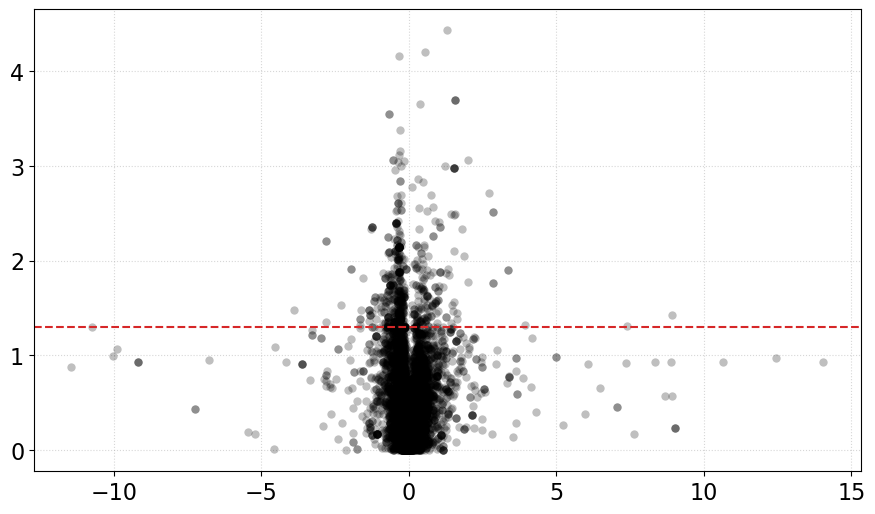

In [14]:
x = wdf['log2FC']
y = -numpy.log10(wdf['Student P'])

matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/4, mec='none')
matplotlib.pyplot.axhline(-numpy.log10(0.05), ls='--', color='tab:red')
matplotlib.pyplot.grid(ls=':', alpha=1/2)

In [15]:
wdf[wdf['Student P'] < 0.05]

,Mann P,Student P,log2FC,c_median,a_median,a1,a2,a3,c1,c2,c3
Accession,,,,,,,,,,,
P32856|STX2_HUMAN,0.080856,0.026485,-0.374502,11.858442,11.483941,11.685319,11.483941,11.442906,11.930292,11.858442,11.755278
P30876|RPB2_HUMAN,0.080856,0.020456,-0.153217,13.956342,13.803126,13.804412,13.803126,13.730362,13.999369,13.956342,13.874342
H0Y6V6|H0Y6V6_HUMAN,0.080856,0.035101,-0.313880,10.673964,10.360085,10.458327,10.360085,10.081522,10.704285,10.612269,10.673964
Q9NZ43|USE1_HUMAN,0.080856,0.026010,-0.826822,14.532463,13.705641,13.705641,13.681418,13.804228,14.141498,14.532463,14.942019
Q9NW82|WDR70_HUMAN,0.080856,0.009557,0.444295,11.735859,12.180154,12.236455,12.180154,11.967578,11.765583,11.668277,11.735859
...,...,...,...,...,...,...,...,...,...,...,...
Q49A26|GLYR1_HUMAN,0.080856,0.048871,-0.459090,12.750013,12.290924,12.578075,12.290924,11.975132,12.750013,12.884768,12.728086
A0A7P0TBA9|A0A7P0TBA9_HUMAN,0.080856,0.033802,-0.338254,13.410442,13.072188,12.954501,13.255862,13.072188,13.410442,13.689759,13.405321
F8W1V1|F8W1V1_HUMAN,0.080856,0.018146,0.262603,6.882346,7.144948,7.036746,7.216384,7.144948,6.882346,6.925497,6.762237


In [16]:
wdf.to_csv('proteomics.table.tsv', sep='\t')